# Investingating Fandango Movie Ratings

In October 2015, Walt Hickey, a data journalist, analysed movie ratings data in Fandango. He found strong evidence that Fandango's,an online movie ratings aggregator, rating system was fabricated. [Walt Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/)

The main findings are:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

![Source: FiveThirtyEight](https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png)

The goal for this project is to find out if Fandango is still inflating the ratings. 


## Understanding the Data

Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
files = {'fandango_score_comparison':'fandango_score_comparison.csv'
         , 'movie_ratings_16_17':'movie_ratings_16_17.csv'}
fandango_score_comparison = pd.read_csv(files['fandango_score_comparison'])
movie_ratings_16_17 = pd.read_csv(files['movie_ratings_16_17'])
    

The columns that we are interested in are:
For fandango_score_comparison: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'
For the other data set: 'movie', 'year', 'fandango'

In [3]:
columns_hickey = ['FILM', 'Fandango_Stars'
           , 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
columns_other = ['movie', 'year', 'fandango']

In [4]:
fandang_trimmed = fandango_score_comparison[columns_hickey]

In [5]:

movie_trimmed = movie_ratings_16_17[columns_other]

fandango_score_comparison.csv contains every film that has *a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango*. The data from Fandango was pulled on Aug. 24, 2015. from repository README.md

movie_ratings_16_17.csv contains movie ratings data for *214 of the most popular movies (with a significant number of votes) released in 2016 and 2017*. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017. from repository README.md

We can't say they are simple random samples, however it should be enough samples to determine whether they are fabricating the ratings up to 2017 still.  

Since we can't say the samples are randomly collected, we can't say that the samples represent the population. However, it's still valid to see if Fandango is still fabricating at least some of the ratings. 

With that, the new goals are:

- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

Popular is a vague term. We will use Hickey's benchmark of 30 fan ratings and consider a movie as "pupular" only if it has 30 fan ratings or more on Fandango's website. 

We can see that the fandango list doesn't have any movie that has less than 30 fan votes. However, the other data set doesn't have any indicator for fan votes. We can raise a question if the other dataset is a good representation of the population. 

In [6]:
fandang_trimmed[fandang_trimmed['Fandango_votes'] < 30].shape

(0, 5)

In [7]:
movie_trimmed.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

|Movie   |Fan ratings
|---|---|
|Mechanic: Resurrection |	2247|
|Warcraft|	7271|
|Max Steel|	493|
|Me Before You|	5263|
|Fantastic Beasts and Where to Find Them|	13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King |	500
|Captain America: Civil War |	35057|


From Hickey's list you can notice that some of the movies weren't from 2015 or 2016. For the goal, we are going to separate them.

In [8]:
fandang_trimmed.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
fandang_trimmed['Year'] = fandang_trimmed['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [10]:
fandang_trimmed.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
fandang_trimmed[fandang_trimmed['Year'] == '2016']

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year


In [12]:
fandang_trimmed_2015 = fandang_trimmed[fandang_trimmed['Year'] == '2015']
fandang_trimmed_2016 = movie_ratings_16_17[movie_ratings_16_17['year'] == 2016]

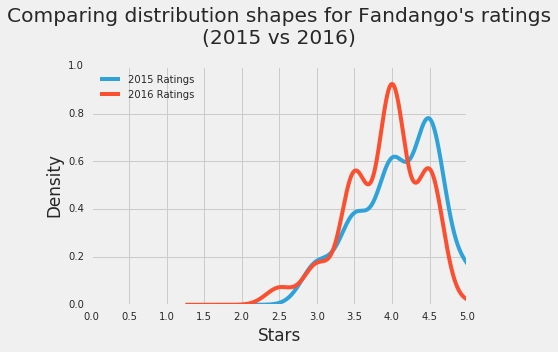

In [15]:
plt.style.use('fivethirtyeight')

fandang_trimmed_2015['Fandango_Stars'].plot.kde(label = '2015 Ratings', legend = True)
fandang_trimmed_2016['fandango'].plot.kde(label = '2016 Ratings', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()



If you look at the plot, 2016 rating looks closer to the normal distribution. It's centered around 4. In 2015 ratins more skewed to the left putting the weight more to the right. It suggests that the fabrication stopped. 

## Comparing Relative Frequencies

In [17]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fandang_trimmed_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [20]:
print('2016' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fandang_trimmed_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the result above, You can see number of movies that have over 4.5 ratins dropped significantly in 2016. 

## Determining the Direction of the Change

In [23]:
mean_2015 = fandang_trimmed_2015['Fandango_Stars'].mean()
mean_2016 = fandang_trimmed_2016['fandango'].mean()

median_2015 = fandang_trimmed_2015['Fandango_Stars'].median()
median_2016 = fandang_trimmed_2016['fandango'].median()

mode_2015 = fandang_trimmed_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandang_trimmed_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


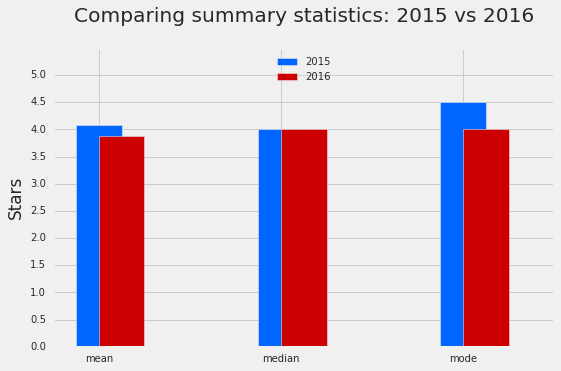

In [25]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [26]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

The analysis shows that the mean of the ratings dropped almost 5%, mostly contributed by the number of movies that had over 4.5 ratings dropped. The analysis has limitation. The sample weren't randomly selected. This could have led to a bias. We did use the benchmark to 